In [57]:
import pandas as pd
from datetime import datetime

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')
import make_report_evolutions as mre
import numpy as np

In [2]:
#loading file
df = pd.read_csv('../list_investments/my_list_of_investments.csv', skipinitialspace=True)

#Removing missing time values
df['start_date'] = df['start_date'].fillna(datetime.now())
df['end_date'] = df['end_date'].fillna(datetime.now())

#Fixing data types
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

#Time differences
df['delta_t'] = (df['end_date'] - df['start_date'])#.astype('timedelta64[s]')

In [20]:
df.head()

,coin,amount,type,start_date,end_date,start_value_usd,end_value_usd,start_value_btc,end_value_btc,delta_t
0,BTG,12.0000,bitcoin,2019-04-27 12:00:00,2020-01-25 20:57:51.026716,887.2,NaN,0.1000,NaN,273 days 08:57:51.026716
1,BTC,0.0571,usd,2019-07-11 13:00:00,2019-08-06 00:00:00.000000,653.3,694.03,0.0571,0.0571,25 days 11:00:00


In [19]:
df.dtypes

coin                        object
amount                     float64
type                        object
start_date          datetime64[ns]
end_date            datetime64[ns]
start_value_usd            float64
end_value_usd              float64
start_value_btc            float64
end_value_btc              float64
delta_t            timedelta64[ns]
dtype: object

In [11]:
seconds_in_the_past = (datetime.now() - df['start_date'].min() ).total_seconds()



In [12]:
data  = mre.read_crypto_data('BTC', seconds_in_the_past)[['time_re', 'price_usd', 'price_btc']]

In [13]:
data.head()

,time_re,price_usd,price_btc
0,1571948109,7469.96,1.0
1,1571948411,7468.35,1.0
2,1571948715,7464.74,1.0
3,1571949020,7467.54,1.0
4,1571949321,7466.81,1.0


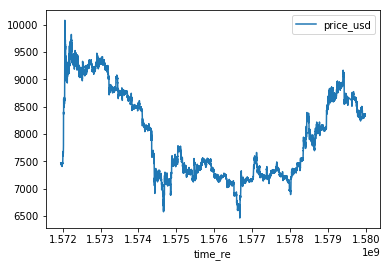

In [17]:
data.plot(x='time_re', y='price_usd')

In [25]:
def load_usd_btc_prices_for_one_investment(coin, date_start, date_end):
    
    seconds_in_the_past = (datetime.now() - date_start ).total_seconds()

    df_temp  = mre.read_crypto_data(coin, seconds_in_the_past)[['time_re', 'price_usd', 'price_btc']]
    
    return df_temp[df_temp['time_re'] <= date_end.timestamp()]

In [60]:
print(df['coin'].iloc[0])

load_usd_btc_prices_for_one_investment(df['coin'].iloc[0], df['start_date'].iloc[0], df['end_date'].iloc[0])

BTG     


,time_re,price_usd,price_btc
0,1571948109,7.04,0.000942
1,1571948411,7.04,0.000943
2,1571948715,7.05,0.000944
3,1571949020,7.06,0.000945
4,1571949321,7.05,0.000944
5,1571949624,7.05,0.000945
6,1571949925,7.05,0.000945
7,1571950227,7.05,0.000945
8,1571950528,7.04,0.000944
9,1571950829,7.04,0.000944


In [47]:
def load_one_investment(df_investments):
    
    coin = df_investments['coin']
    start_date = df_investments['start_date']
    end_date = df_investments['end_date']
    amount = df_investments['amount']
    
    df_temp = load_usd_btc_prices_for_one_investment(coin, start_date, end_date)
    
    df_temp.columns = ['time_re', 'value_usd', 'value_btc']
    
    df_temp['value_usd'] = df_temp['value_usd'].apply(lambda x: x*amount)
    df_temp['value_btc'] = df_temp['value_btc'].apply(lambda x: x*amount)
    
    return df_temp

Coin:  BTG     
Investment type:  bitcoin   
Amount:  12.0
Status: ACTIVE
Initial date:  2019-04-27 12:00:00
End date    :  running now!
Duration: 273 days
Initial value (usd):  887.2
Final value   (usd):  120.48
Delta usd: -86.42 %
Initial value (btc):  0.1
Final value   (btc):  0.014405831205
Delta usd: -85.59 %
 
Coin:  BTC     
Investment type:  usd       
Amount:  0.0571
Status: ENDED
Initial date:  2019-07-11 13:00:00
End date    :  2019-08-06 00:00:00
Duration: 25 days
Initial value (usd):  653.3
Final value   (usd):  694.03
Delta usd: 6.23 %
Initial value (btc):  0.0571
Final value   (btc):  0.0571
Delta usd: 0.00 %
 


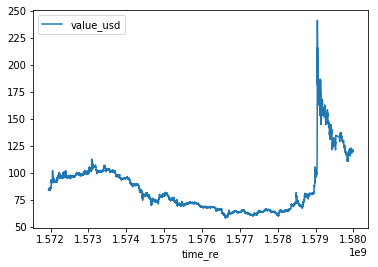

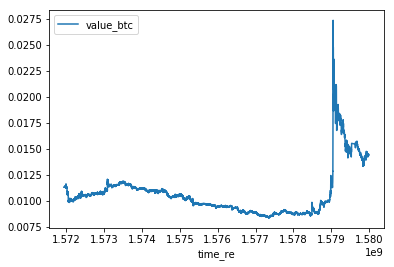

In [74]:
for index, row in df.iterrows():
    
    df_temp = load_one_investment(row)
    
    print("Coin: ", row['coin'])
    print("Investment type: ", row['type'])
    print("Amount: ", row['amount'])
    
    if np.isnan(row['end_value_usd']):
        print("Status: ACTIVE")
        final_value_usd = df_temp['value_usd'].iloc[-1]
        final_value_btc = df_temp['value_btc'].iloc[-1]
    else:
        print("Status: ENDED")
        final_value_usd = row['end_value_usd']
        final_value_btc = row['end_value_btc']
    
    print("Initial date: ", row['start_date'])
    if np.isnan(row['end_value_usd']):
        print("End date    :  running now!")
    else:
        print("End date    : ", row['end_date'])
    print(f"Duration: {row['delta_t'].days} days")
    
    print("Initial value (usd): ", row['start_value_usd'])
    print("Final value   (usd): ", final_value_usd)
    print(f"Delta usd: { 100.0*(final_value_usd-row['start_value_usd'])/row['start_value_usd']:.2f} %" )
    print("Initial value (btc): ", row['start_value_btc'])
    print("Final value   (btc): ", final_value_btc)
    print(f"Delta usd: { 100.0*(final_value_btc-row['start_value_btc'])/row['start_value_btc']:.2f} %" )
    
    
    print(" ")
    if df_temp.shape[0] == 0:
        continue

    df_temp.plot('time_re', 'value_usd')
    df_temp.plot('time_re', 'value_btc')
